<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [4]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [5]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

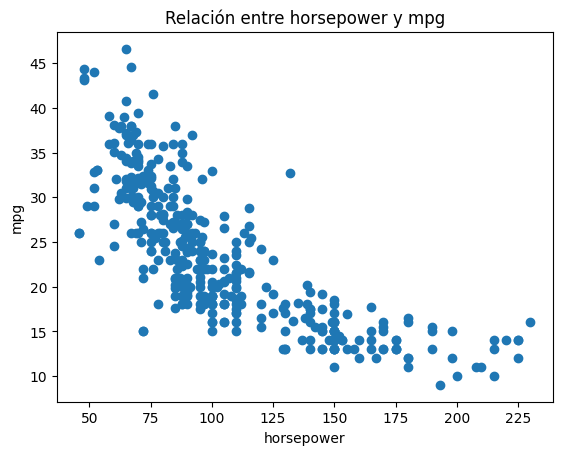

In [6]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    plt.scatter(df[nombre_columna],y)
    plt.xlabel(nombre_columna)
    plt.ylabel('mpg')
    plt.title(f'Relación entre {nombre_columna} y mpg')
    plt.show()
    

visualiza(X, y, 'horsepower')

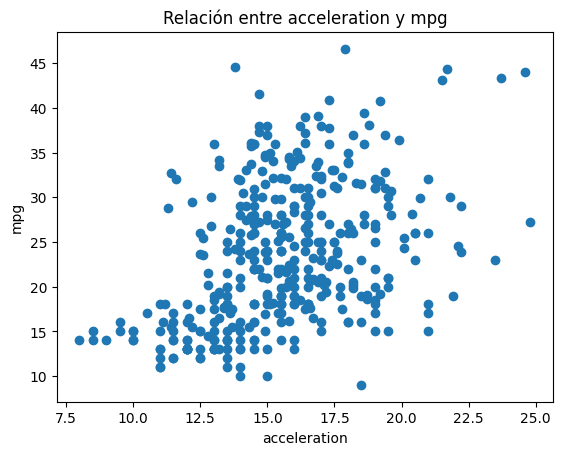

In [7]:
visualiza(X, y, 'acceleration')

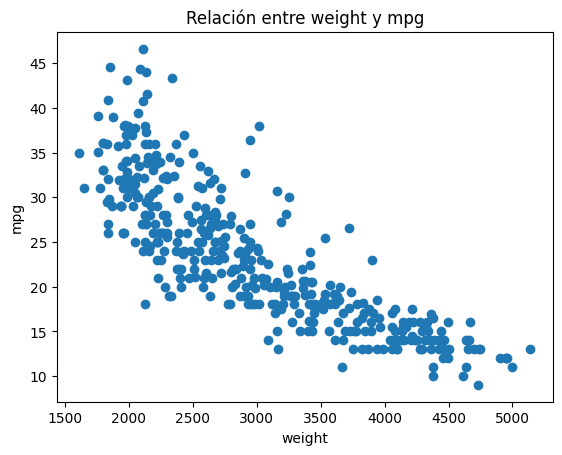

In [8]:
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.


In [48]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial

    # TODO 1: Comprueba que las dimensiones son adecuadas y corrige si no es así
    if X.shape[1] > X.shape[0]:
        X = X.T
    
    # TODO 2: Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    X_b = np.hstack((np.ones((X.shape[0], 1)), X))

    # TODO 3: Calcula los pesos
    w = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    return w

In [49]:
# Array de prueba!!
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

Punto de corte (w0): 46.317364420265655
Pendiente (w1): -0.007676610063926457


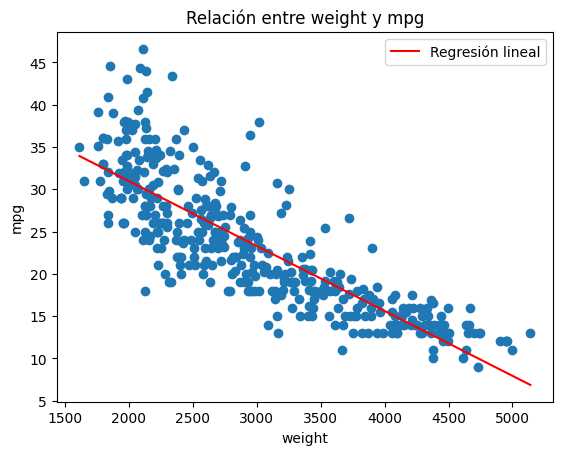

In [73]:
# Preparar los datos
X_weight = np.array(X['weight']).reshape(-1,1)
y_mpg = np.array(y['mpg'])

# Calcular los pesos
pesos = pesos_ols(X_weight, y_mpg)
print("Punto de corte (w0):", pesos[0])
print("Pendiente (w1):", pesos[1])

# Ajustar función de visualización
def visualiza(df, y, nombre_columna, pesos=None):
    plt.scatter(df[nombre_columna], y)
    plt.xlabel(nombre_columna)
    plt.ylabel('mpg')
    plt.title(f'Relación entre {nombre_columna} y mpg')
    
    # Dibujar la recta de regresión a partir de los pesos
    if pesos is not None:  # Si se pasa parametro pesos
        x_plot = np.linspace(df[nombre_columna].min(), df[nombre_columna].max(), 100)
        y_plot = pesos[0] + pesos[1] * x_plot
        plt.plot(x_plot, y_plot, color='red', label='Regresión lineal')
        plt.legend()
    
    plt.show()

# Visualizar
visualiza(X, y, 'weight', pesos)

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [72]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y[['mpg']]

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


In [80]:
# Residuos metodo 1
y_pred = pesos[0] + pesos[1] * X_weight.flatten()
residuos = y_mpg - y_pred
residuos

array([-1.41852276e+00, -2.96764345e+00, -1.94053224e+00, -3.96356207e+00,
       -2.84073631e+00,  2.00679987e+00,  1.10659580e+00,  7.84178175e-01,
        1.65163511e+00, -1.76241567e+00, -3.96560276e+00, -4.61247870e+00,
       -2.44563397e+00, -8.62734576e+00, -4.10844535e+00, -2.56952811e+00,
       -7.02244810e+00, -5.45797418e+00, -2.96618498e+00, -6.23078495e+00,
       -8.05462329e-01, -3.66320196e+00, -3.08541552e+00, -3.16781754e+00,
       -4.98970097e+00, -8.89808975e-01, -2.72451878e+00, -1.67845912e+00,
       -9.91645598e-01, -2.96618498e+00, -9.37519236e-01, -4.21387720e+00,
       -5.61102023e+00, -7.09717351e+00, -3.91750241e+00, -3.76192952e+00,
       -1.96919799e+00, -3.07667053e+00, -6.51266120e-03,  1.95102291e+00,
       -4.28726215e-01, -8.73969598e-01,  3.72023845e+00,  3.11582694e+00,
        6.14041131e+00, -5.57924541e+00, -5.83208739e+00, -2.12273019e+00,
       -4.22048543e+00, -6.27529008e+00, -2.01992125e+00, -3.96075148e-01,
       -4.65164638e-01, -

In [78]:
# Residuos Método 2 (sklearn)
y_pred_sklearn = lr.predict(X_lr)
residuos_sklearn = y_lr - y_pred_sklearn
residuos_sklearn


,mpg
0,-1.418523
1,-2.967643
2,-1.940532
3,-3.963562
4,-2.840736
...,...
393,2.100378
394,14.033815
395,3.300456
396,1.833737


In [84]:
# R cuadrado
# Método 1 (manual)
ss_res = np.sum((y_mpg - y_pred)**2)  
ss_tot = np.sum((y_mpg - np.mean(y_mpg))**2) 
r2_manual = 1 - (ss_res / ss_tot)
print("R^2 (manual):", r2_manual)

# Método 2 (sklearn)
r2_sklearn = lr.score(X_lr, y_lr)
print("R^2 (scikit-learn):", r2_sklearn)


R^2 (manual): 0.6917929800341573
R^2 (scikit-learn): 0.6917929800341573


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

Ambos modelos coinciden en valores de punto de corte, pendiente, así como en el residuo y en el R cuadrado. 
Esto indica que la implementación del modelo es correcta. 
Aunque usar scikit-learn es mucho más rápido y fiable, ya que el modelo presenta varios puntos críticos que pueden fallar a la hora de la implementación como por ejemplo cambiar el dataframe por arrays para poder hacer las operaciones con matrices. 

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



* El **método de mínimos**:
    * Pasos:
        1. Preparar los datos.
            - Verificar que las dimensiones de las matrices son adecuadas.
            - Añadir una columna de unos a la matriz 
        2. Calcular los pesos
    * Es mejor cuando nuestro conjunto de datos es menor y las relaciones entre nuestras variables están bien definidas. En este caso, obtendremos una solución rápida y más directa.

* El **descenso de gradientes**:
    * Pasos:
        1. Preparar los datos.
            - Verificar que las dimensiones de las matrices son adecuadas.
        2. Iniciar los parámetros para los pesos e iterar.
        3. Calcular Learning Rate
        4. Calcular el gradiente de la función de coste.
    * Es más adecuado para conjuntos de datos grandes o cuando las relaciones entre las variables son complejas o hay muchas variables, lo que hace aumentar la complejidad del modelo.

## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [100]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 Añade la columna de 1s

    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    
    # TODO 2 Haz un bucle para las iteraciones 

    for i in range(n_iter):
        # Predicción
        y_pred = np.dot(X, w)
        # Error
        error = y_pred - y
        # Gradiente del RSS
        gradient = np.dot(X.T, error) / len(y)
        # Actualización de los pesos
        w = w - eta * gradient

        # TODO 3 Dentro del bucle tendrás que actualizar el error y los pesos y añadirlos a las listas
        current_loss = np.sum(error**2) / 2
        loss_iter.append(current_loss)
        w_iter.append(w)

    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

[[183695.36963666]
 [ 40682.97678324]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [14]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

In [103]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate

w0 = np.random.rand(2).reshape((2,1)) 
eta = 0.01 
iteraciones = 2000 

# TODO 2 Aplicamos el algoritmo

X_gd = np.hstack([np.ones((X_gd.shape[0], 1)), X_gd])
weights = gradient_descent(X_gd, y_gd, w0, iteraciones, eta)

# Límites de los ejes

x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gráfica

x_plot = np.linspace(x_min, x_max, 100)
y_plot = weights[0] + weights[1] * x_plot

plt.figure(figsize=(10, 6))
plt.scatter(X_gd[:, 1], y_gd, color='blue', label='Datos Reales')
plt.plot(x_plot, y_plot, color='red', label='Recta de Regresión')
plt.xlabel('Peso Normalizado')
plt.ylabel('Consumo de Combustible (mpg)')
plt.title('Relación entre Peso y Consumo de Combustible')
plt.legend()
plt.show()


ValueError: shapes (398,3) and (2,1) not aligned: 3 (dim 1) != 2 (dim 0)